In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("movies.csv")

In [5]:
df.drop(labels = ["Unnamed: 2",	"Unnamed: 3",	"Unnamed: 4",	"Unnamed: 5", "Unnamed: 8", "runtime"], axis =1 ,inplace =True)

In [6]:
df.dropna(inplace = True)

In [7]:
# Let us binary classification
# Movies less than a score of 6.5 are given a label of zero and movies greater than 6.5 are given a score of 1
label = []
for i in df['score']:
  if i < 6.5:
    i = 0
    label.append(i)
  else:
    i = 1
    label.append(i)

In [8]:
df['label'] = label
df['label'].value_counts()

1    2732
0    2704
Name: label, dtype: int64

In [9]:
df.drop(labels = ['score'] , axis =1 , inplace =True)
Y= df.loc[:,['label']]
X = df.iloc[:,0:3]

In [68]:
df

,votes,budget,gross,label
0,927000.0,19000000.0,46998772.0,1
1,65000.0,4500000.0,58853106.0,0
2,1200000.0,18000000.0,538375067.0,1
3,221000.0,3500000.0,83453539.0,1
4,108000.0,6000000.0,39846344.0,1
...,...,...,...,...
7648,140000.0,90000000.0,426505244.0,1
7649,102000.0,85000000.0,319715683.0,1
7650,53000.0,175000000.0,245487753.0,0
7651,42000.0,135000000.0,111105497.0,1


In [10]:
X.shape , Y.shape

((5436, 3), (5436, 1))

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

In [15]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

In [16]:
model = Sequential()
model.add(Dense(1, input_dim =3, activation ="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss ="binary_crossentropy" , optimizer ='rmsprop', metrics = ['accuracy'])

In [18]:
history = model.fit(X_scaled,Y, epochs = 500 , verbose =1)

Epoch 1/500
170/170 [==============================] - 1s 2ms/step - loss: 0.6800 - accuracy: 0.6615
Epoch 2/500
170/170 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.6691
Epoch 3/500
170/170 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.6698
Epoch 4/500
170/170 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.6626
Epoch 5/500
170/170 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.6610
Epoch 6/500
170/170 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.6534
Epoch 7/500
170/170 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.6536
Epoch 8/500
170/170 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.6545
Epoch 9/500
170/170 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6534
Epoch 10/500
170/170 [==============================] - 0s 2ms/step - loss: 0.6638 - accura

In [52]:
model1 = Sequential()
model1.add(Dense(6, input_dim=3, activation='relu'))
model1.add(Dense(6, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 6)                 24        
                                                                 
 dense_26 (Dense)            (None, 6)                 42        
                                                                 
 dense_27 (Dense)            (None, 1)                 7         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [53]:
model1.compile(loss ="binary_crossentropy" , optimizer ='rmsprop', metrics = ['accuracy'])

In [54]:
history1 = model1.fit(X_scaled, Y, epochs=500, batch_size=30, verbose=1)

Epoch 1/500
182/182 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5088
Epoch 2/500
182/182 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5579
Epoch 3/500
182/182 [==============================] - 1s 3ms/step - loss: 0.6852 - accuracy: 0.5664
Epoch 4/500
182/182 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.6089
Epoch 5/500
182/182 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.6214
Epoch 6/500
182/182 [==============================] - 0s 2ms/step - loss: 0.6605 - accuracy: 0.6328
Epoch 7/500
182/182 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.6426
Epoch 8/500
182/182 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.6516
Epoch 9/500
182/182 [==============================] - 0s 2ms/step - loss: 0.6309 - accuracy: 0.6593
Epoch 10/500
182/182 [==============================] - 0s 2ms/step - loss: 0.6216 - accura

In [56]:
loss1, acc1 = model1.evaluate(X_test, y_test)
print(f"Loss is {loss1},\nAccuracy is {acc1*100}")

43/43 [==============================] - 0s 6ms/step - loss: 0.5208 - accuracy: 0.7322
Loss is 0.5207967162132263,
Accuracy is 73.2155978679657


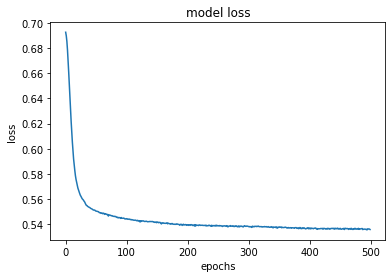

In [57]:
import matplotlib.pyplot as plt 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.plot(history1.history['loss'])

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y , test_size =0.25) #splitting dataset into 2 halves

In [63]:
model2 = Sequential()
model2.add(Dense(6, input_dim=3, activation='relu'))
model2.add(Dense(6, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 6)                 24        
                                                                 
 dense_32 (Dense)            (None, 6)                 42        
                                                                 
 dense_33 (Dense)            (None, 1)                 7         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [64]:
model2.compile(optimizer='rmsprop',loss ="binary_crossentropy", metrics=['acc', 'mse'])
hist = model2.fit(X_train, y_train, epochs=500, batch_size=50, validation_data=(X_test,y_test))

Epoch 1/500
82/82 [==============================] - 1s 6ms/step - loss: 0.6927 - acc: 0.5075 - mse: 0.2498 - val_loss: 0.6904 - val_acc: 0.6291 - val_mse: 0.2486
Epoch 2/500
82/82 [==============================] - 0s 4ms/step - loss: 0.6885 - acc: 0.6206 - mse: 0.2477 - val_loss: 0.6862 - val_acc: 0.6277 - val_mse: 0.2465
Epoch 3/500
82/82 [==============================] - 0s 4ms/step - loss: 0.6838 - acc: 0.6301 - mse: 0.2453 - val_loss: 0.6813 - val_acc: 0.6358 - val_mse: 0.2441
Epoch 4/500
82/82 [==============================] - 0s 4ms/step - loss: 0.6788 - acc: 0.6284 - mse: 0.2429 - val_loss: 0.6761 - val_acc: 0.6350 - val_mse: 0.2416
Epoch 5/500
82/82 [==============================] - 0s 4ms/step - loss: 0.6731 - acc: 0.6301 - mse: 0.2401 - val_loss: 0.6698 - val_acc: 0.6424 - val_mse: 0.2385
Epoch 6/500
82/82 [==============================] - 0s 4ms/step - loss: 0.6665 - acc: 0.6370 - mse: 0.2370 - val_loss: 0.6633 - val_acc: 0.6453 - val_mse: 0.2354
Epoch 7/500
82/82 [===

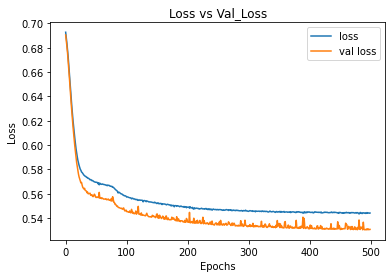

In [65]:
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

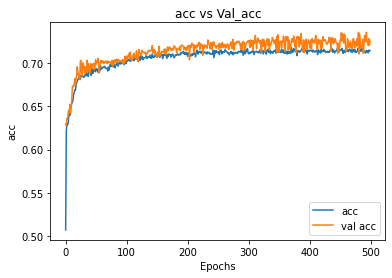

In [66]:
plt.plot(hist.history['acc'], label = 'acc')
plt.plot(hist.history['val_acc'], label='val acc')
plt.title("acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [67]:
loss2, acc2, mse2 = model2.evaluate(X_test, y_test)
print(f"Loss is {loss2},\nAccuracy is {acc2*100},\nMSE is {mse2}")

43/43 [==============================] - 0s 2ms/step - loss: 0.5308 - acc: 0.7248 - mse: 0.1806
Loss is 0.5308170318603516,
Accuracy is 72.47976660728455,
MSE is 0.1806250363588333


In [73]:
model2_predictions = model2.predict(X_test)

43/43 [==============================] - 0s 3ms/step


In [76]:
y_pred = model2_predictions.round()

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix = confusion_matrix(y_pred, y_test)

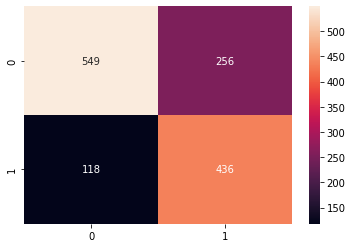

In [86]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot =True,fmt='g')

In [59]:
model3 = Sequential()
model3.add(Dense(8, input_dim=3, activation='relu'))
model3.add(Dense(4, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 8)                 32        
                                                                 
 dense_29 (Dense)            (None, 4)                 36        
                                                                 
 dense_30 (Dense)            (None, 1)                 5         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [60]:
model3.compile(loss ="binary_crossentropy" , optimizer ='rmsprop', metrics = ['accuracy'])
history3 = model3.fit(X_scaled, Y, epochs=200, batch_size=30, verbose=1)

Epoch 1/200
182/182 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.5184
Epoch 2/200
182/182 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5809
Epoch 3/200
182/182 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.6199
Epoch 4/200
182/182 [==============================] - 0s 3ms/step - loss: 0.6660 - accuracy: 0.6398
Epoch 5/200
182/182 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.6453
Epoch 6/200
182/182 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.6532
Epoch 7/200
182/182 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.6600
Epoch 8/200
182/182 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.6702
Epoch 9/200
182/182 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.6737
Epoch 10/200
182/182 [==============================] - 0s 2ms/step - loss: 0.6201 - accura

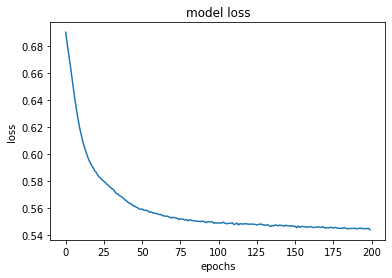

In [62]:
import matplotlib.pyplot as plt 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.plot(history3.history['loss'])